# Semester Project: Climate Change
#### Team 9: Alyssa Carnes; Shannon Leroi; Matthew August Krieger
Modeling global warming data and predicting the trend

# Part 1: Data Importing, Cleaning & Analyzation 

In [1]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from datetime import datetime

In [2]:
#loading in our data
tempdata = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)
edata = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_511927.csv', skiprows=3)

In [3]:
#data range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')
t = pd.DataFrame(date_rng, columns=['date'])
# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None
# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [4]:
tempdata = tempdata.iloc[:,:13]
tempdata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [5]:
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        t.loc[date_index] = monthly_anomolies[month]
_ = tempdata.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [6]:
# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))
# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)
# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


/Users/shannonleroi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


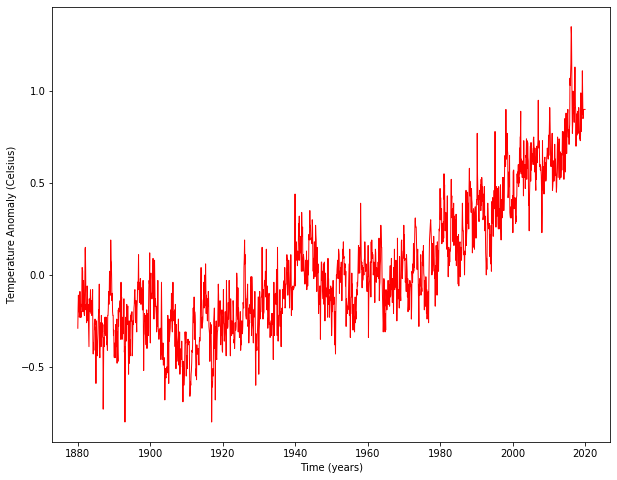

In [7]:
# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.plot(t, color='Red', linewidth=1.0)

In [8]:
t.resample('A').mean().head()  #changes from months to the end of each calendar year. Below is documentation and info
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


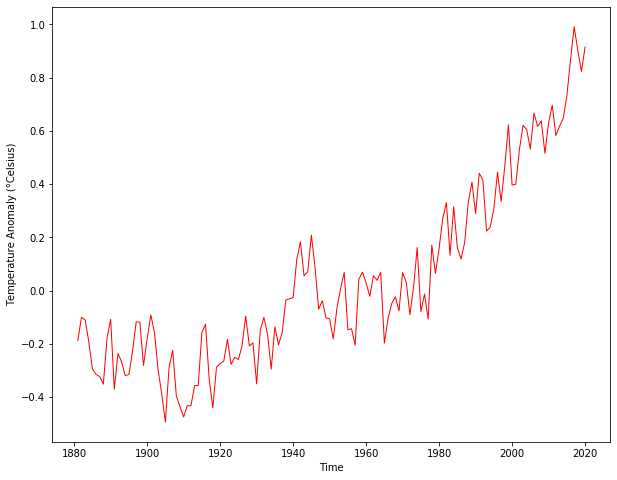

In [9]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='Red', linewidth=1.0)

In [10]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
raw_e_world = edata[edata['Country Name']=='World'].loc[:,'1960':'2018']
# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']
# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])
# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


In [11]:
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


In [12]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


In [13]:
e['1984-01-04':'1990-01-06']

,Global CO2 Emissions per Capita
date,
1984-12-31,4.024779
1985-12-31,4.074093
1986-12-31,4.124274
1987-12-31,4.152156
1988-12-31,4.226610
1989-12-31,4.243794


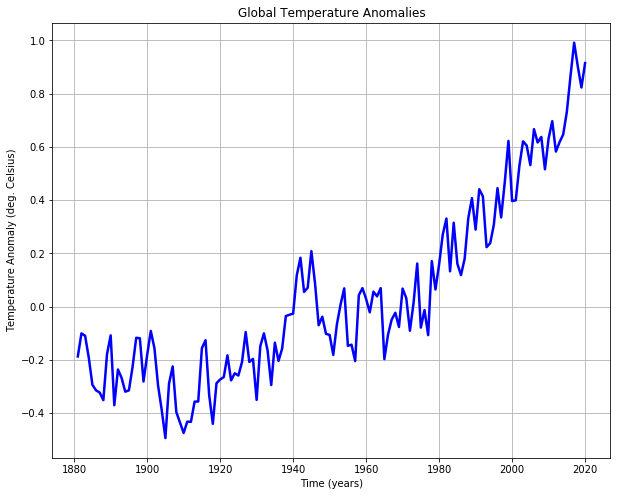

In [14]:
# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='Blue', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()

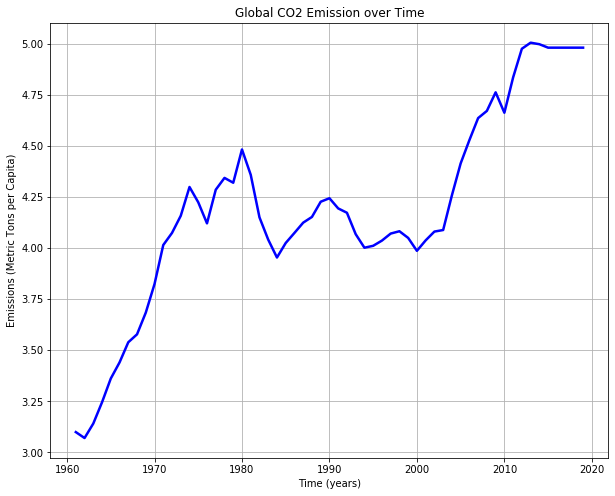

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color='Blue', linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')
ax.grid()

In [16]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/shannonleroi/opt/anaconda3/lib/python3.7/site-packages (4.3.0)
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [19]:
#pip install fbprophet

It failed to install on my jupter notebook, so used this command instead in my terminal: conda install -c conda-forge fbprophet

In [20]:
# Standard plotly imports
import chart_studio as py
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
#Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [21]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='Red',
                  yTitle='Temperature Anomaly (Celsius)', title='Global Temperature Anomalies')

In [22]:
e.iplot(kind='line', xTitle='Time (years)', color='Blue',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


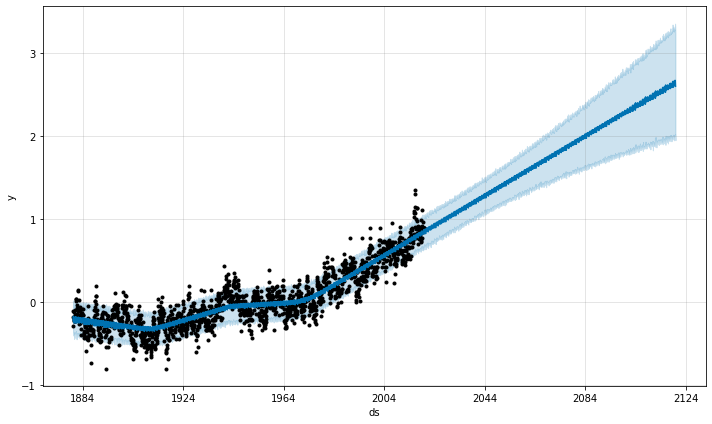

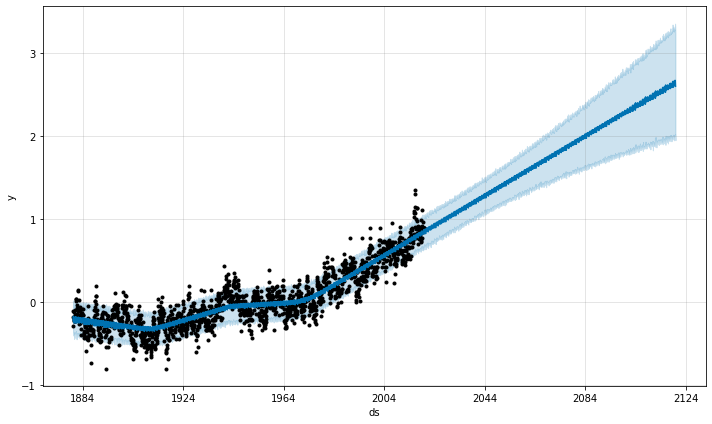

In [23]:
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet
# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


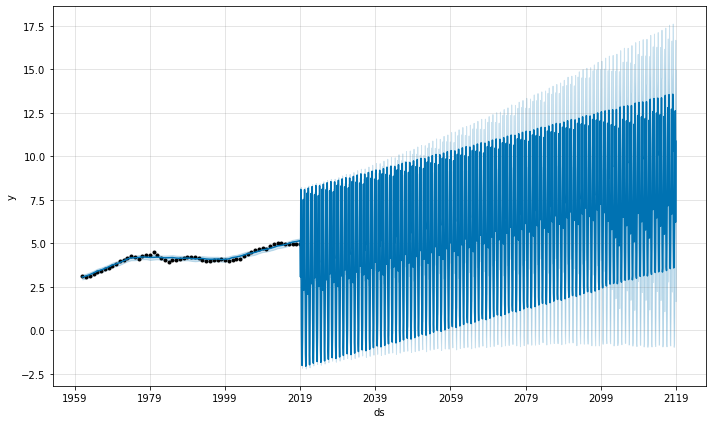

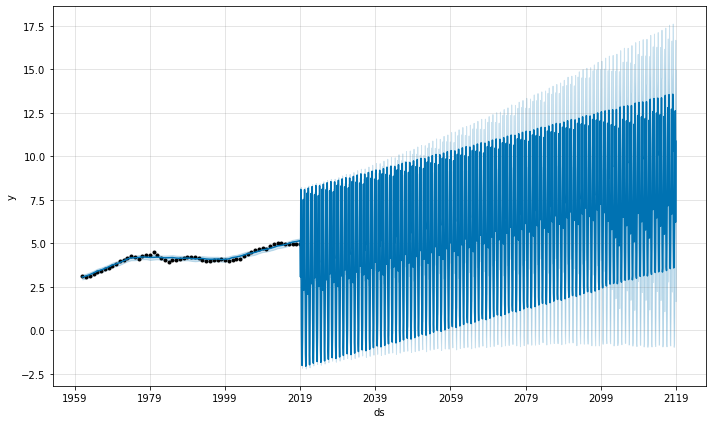

In [24]:
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet
# Create a new DataFrame with which we will create/train our Prophet model 
e_prophet = pd.DataFrame()
e_prophet['ds'] = e.index
e_prophet['y'] = e['Global CO2 Emissions per Capita'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(e_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future1 = m.make_future_dataframe(freq='m', periods=100*12)
forecast1 = m.predict(future1)

# Plot the resulting forecast
m.plot(forecast1)

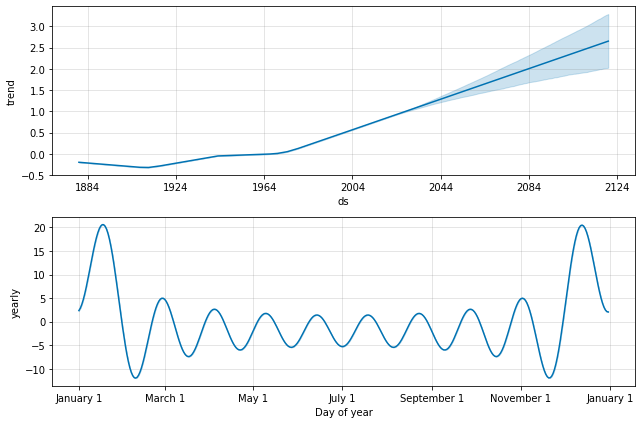

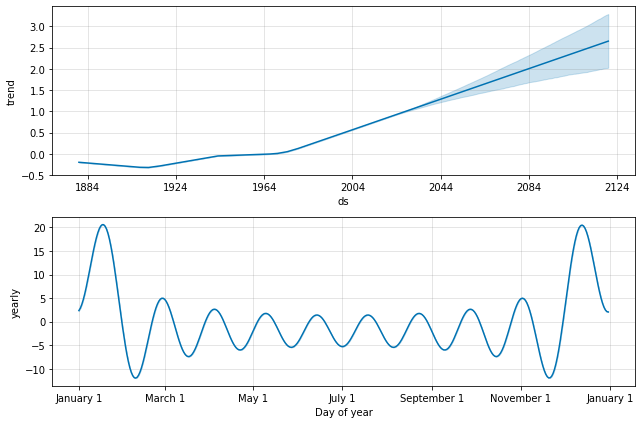

In [25]:
m.plot_components(forecast)

# Check out correlation

In [26]:
print(len(e))
print(len(t_resampled))

59
140


In [27]:
#we need our temperature and co2 datasets to be the same size
t1_final=t_resampled[80:]
len(t1_final)
t1_final.tail()

,Avg_Anomaly_deg_C
date,
2015-12-31,0.865833
2016-12-31,0.991667
2017-12-31,0.902500
2018-12-31,0.823333
2019-12-31,0.915000


In [28]:
t_final=t1_final.drop(t1_final.index[len(t1_final)-1])
t_final.tail()

,Avg_Anomaly_deg_C
date,
2014-12-31,0.731667
2015-12-31,0.865833
2016-12-31,0.991667
2017-12-31,0.902500
2018-12-31,0.823333


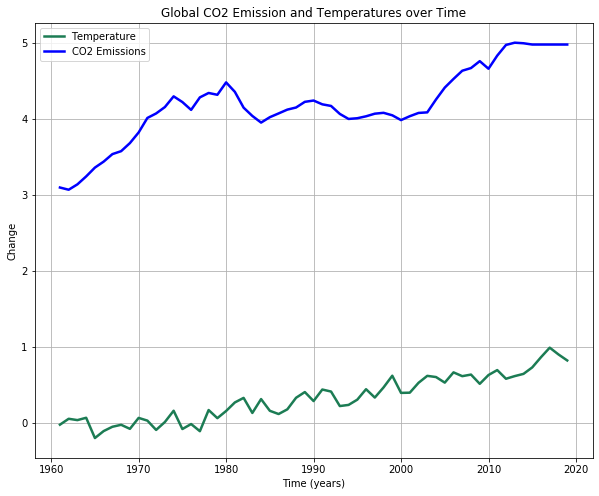

In [51]:
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline
# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_final, color='#1C7C54', linewidth=2.5, label = 'Temperature')

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Change',
       title='Global Temperature Anomalies')

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='blue', linewidth=2.5, label = "CO2 Emissions")

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Change',
       title='Global CO2 Emission and Temperatures over Time')

# Enable grid
ax.grid()
ax.legend()

In [30]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# calculate spearman's correlation
corr, _ = spearmanr(t_final, e)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.685


# Regression

#### a) first with the temp data

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

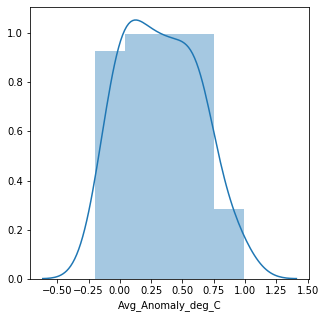

In [32]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(t_final['Avg_Anomaly_deg_C'])

In [33]:
#X = t_final['Avg_Anomaly_deg_C'].values.reshape(-1,1)
X = t_final['Avg_Anomaly_deg_C'].values.reshape(-1,1)
Y = e['Global CO2 Emissions per Capita'].values.reshape(-1,1)
#X1=tempdata['Year']

In [34]:
date_rng
# Categorical boolean mask
categorical_feature_mask1 = date_rng.dtype== 'datetime64[ns]'
# filter categorical columns using mask and turn it into a list


In [35]:
# # Categorical boolean mask
# categorical_feature_mask = X.dtypes== 'float64'
# # filter categorical columns using mask and turn it into a list
# categorical_cols = X[categorical_feature_mask]

In [36]:
# # import labelencoder
# from sklearn.preprocessing import LabelEncoder
# # instantiate labelencoder object
# le = LabelEncoder()

In [37]:
# # apply le on categorical feature columns
#X1 = X1.apply(lambda col: le.fit_transform(col))
#X1[categorical_cols].head(10)

In [38]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

[3.80886063]
[[1.28785762]]


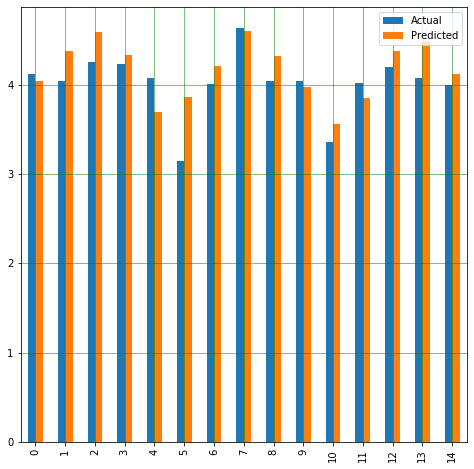

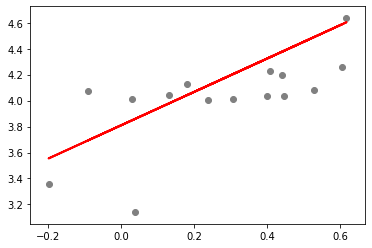

In [39]:
#Model from online
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [40]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

TypeError: float() argument must be a string or a number, not 'Period'

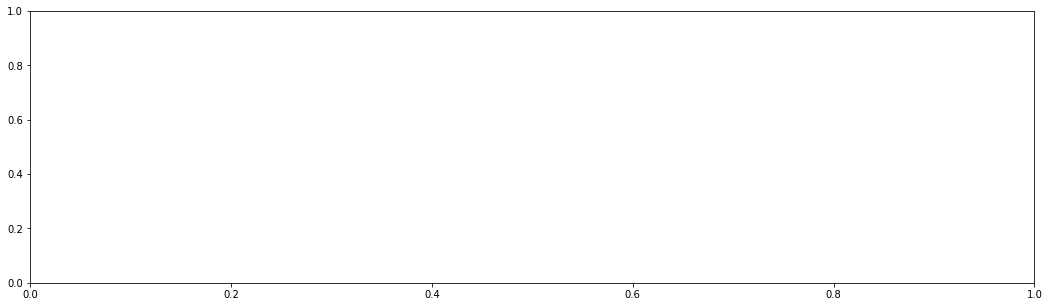

In [41]:
from scipy import stats
from datetime import datetime
std_dev = 3
df = t_final[(np.abs(stats.zscore(t_final)) < float(std_dev)).all(axis=1)]
df.plot(figsize=(18,5))

In [ ]:
# X1 = pd.DataFrame(t_final['Avg_Anomaly_deg_C'])
# X1['Avg_Anomaly_deg_C'] = X1.index.date
# # drop_first = True removes multi-collinearity
# add_var = pd.get_dummies(X1['Avg_Anomaly_deg_C'], prefix='Avg', drop_first=True)
# # Add all the columns to the model data
# X = X1.join(add_var)
# # Drop the original column that was expanded
# #X.drop(columns=['Avg_Anomaly_deg_C'], inplace=True)
# X.head()

In [ ]:
from sklearn.model_selection import KFold
X = pd.DataFrame(e['Global CO2 Emissions per Capita'])
y = pd.DataFrame(t_final['Avg_Anomaly_deg_C'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

# Data Fit

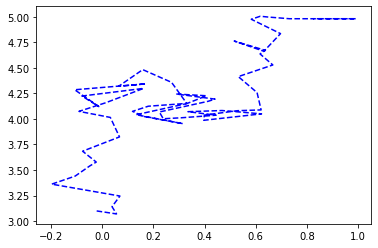

In [48]:

'''
---------------- USER SETS THESE! ----------------
 A_user = parabola width
 B_user = y-axis intercept
 sigma = error added to the y-values (the noise)
 data_points = number of data points we want to use
'''



# plot the "data" so we can see what's going on!
# Note: if you make A too big, it may be hard to see the errors.
plt.plot(X,Y,'b--')
#plt.errorbar(x_data, y_data, yerr=sigma, fmt='ro')

In [ ]:
def chi_squared_error(ydata,ymodel,error):
    '''
    Takes in the observed data, our model's estimated y-values 
    for the model, and our estimate for the errors in the data.
    
    Returns sum-of-squares error (chi-squared error) 
    '''
    
    return ((ydata-ymodel)**2/(2*error**2)).sum()/ydata.size


In [ ]:
chi_squared = chi_squared_error(y_data,y_model,sigma)

print("Our reduced chi-squared value is:", chi_squared)

In [ ]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = t_final
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=1)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data , y_data,p0=[2,2])
                                               
print(params)